<a href="https://www.kaggle.com/code/yassin01/language-detection-using-rf-nb-algorithms?scriptVersionId=113038234" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## ***1- Importing Basic Libraries and Read the Dataset***


In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/language-detection/Language Detection.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
url = 'https://raw.githubusercontent.com/basil-b2s/Language-Detector/master/language_detection.csv'
data = pd.read_csv(url)

In [4]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


## ***2- Understanding the Dataset***

In [5]:
data.shape

(10337, 2)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10337 entries, 0 to 10336
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      10337 non-null  object
 1   Language  10337 non-null  object
dtypes: object(2)
memory usage: 161.6+ KB


In [7]:
data.isnull().sum()

Text        0
Language    0
dtype: int64

#### checking for duplicates

In [8]:
len(data[data.duplicated()])

66

There are 66 duplicate rows, let's drop them...


In [9]:
data.drop_duplicates(inplace=True)

In [10]:
data.shape

(10271, 2)

Let's dive in the dataset!

In [11]:
data["Language"].nunique()

17

The dataset contains texts from 17 different languages

In [12]:
data["Language"].value_counts()

English       1382
French        1007
Spanish        816
Portugeese     736
Italian        694
Russian        688
Sweedish       673
Malayalam      591
Dutch          542
Arabic         532
Turkish        471
German         465
Tamil          464
Danish         424
Kannada        366
Greek          358
Hindi           62
Name: Language, dtype: int64

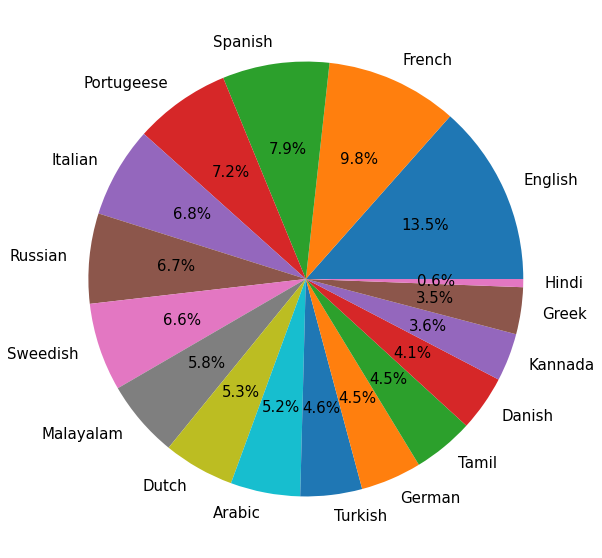

In [13]:
language = data["Language"].value_counts().reset_index()

plt.figure(figsize=(10,10))
labels= language['index']

plt.pie(language["Language"], labels= labels, autopct='%.1f%%', textprops={'fontsize': 15})
plt.show()

## ***3- Text Preprocessing***

first we should create a new column for cleaned text:

In [14]:
data1 = data.copy()
data1["cleaned_Text"] = ""
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,
1,"""Nature"" can refer to the phenomena of the phy...",English,
2,"The study of nature is a large, if not the onl...",English,
3,"Although humans are part of nature, human acti...",English,
4,[1] The word nature is borrowed from the Old F...,English,
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,


In [15]:
def clean_func(Text):
  Text = re.sub(r'[\([{})\]!@#$,"%^*?:;~`0-9]', ' ', Text)   # removing the symbols and numbers
  Text = Text.lower()   # converting the text to lower case
  Text = re.sub('#\S+', '', Text)  # remove hashtags

  return Text 

In [16]:
data1["cleaned_Text"] = data1["Text"].apply(lambda x:clean_func(x))
data1

,Text,Language,cleaned_Text
0,"Nature, in the broadest sense, is the natural...",English,nature in the broadest sense is the natural...
1,"""Nature"" can refer to the phenomena of the phy...",English,nature can refer to the phenomena of the phy...
2,"The study of nature is a large, if not the onl...",English,the study of nature is a large if not the onl...
3,"Although humans are part of nature, human acti...",English,although humans are part of nature human acti...
4,[1] The word nature is borrowed from the Old F...,English,the word nature is borrowed from the old f...
...,...,...,...
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...


### *Separating Input and Output features*

In [17]:
X = data1["cleaned_Text"]
y = data1["Language"]

### *Lable Encoding*

In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y = encoder.fit_transform(y)

### *Bag of Words*
Both the input and the output features must be in numerical form.Therefore, we will use CountVectorizer to build a Bag of Words model

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
X = CV.fit_transform(X).toarray()

In [20]:
X.shape

(10271, 39404)

### *Splitting Training and Testing Data*


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## ***4- Building and Training Model***


In [22]:
 from sklearn.naive_bayes import MultinomialNB
 from sklearn.ensemble import RandomForestClassifier

 models = {"M_Naive_Bayes" : MultinomialNB(), "Random_Forest" : RandomForestClassifier()}

In [23]:
for name, model in models.items():
    print( f'{name} training started...')
    model.fit(X_train, y_train)
    print(f'{name} trained.')

M_Naive_Bayes training started...
M_Naive_Bayes trained.
Random_Forest training started...
Random_Forest trained.


## ***5- Model Evaluation***

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
for name in models:
  acc_score = accuracy_score(y_test, models.get(name).predict(X_test))
  print(f'{name} accuracy score :  {acc_score}')

M_Naive_Bayes accuracy score :  0.9805295950155763
Random_Forest accuracy score :  0.926791277258567


*The accuracy of the "Multinomial Naive Bayes" model is 0.98 which is very good and better a bit than "Random Forest"*

## ***6- Model Prediction***

In [26]:
def prediction(text):
  x = CV.transform([text]).toarray()  # converting text to bag of words model (Vector)
  lang = model.predict(x) # predicting the language
  lang = encoder.inverse_transform(lang) # finding the language corresponding to the predicted value
  print("The langauge is in",lang[0])  # printing the language

In [27]:
prediction( "أنا أحب زكا وفريقها الرائع")

The langauge is in Arabic


In [28]:
prediction("I Love Zaka and its Nice Team")

The langauge is in English


In [29]:
prediction("Ich liebe Zaka und ihre nettes Team")

The langauge is in German
